#### Lab Assignment 6 : Topic Modeling with BERT
#### Name : Garvita Jain , 1229516446
#### File creation date : 2/22/2024


##### Code cell 1

In [44]:
# Import necessary libraries and Input file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install umap-learn

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Quater 3/Analytics unstructured data/restaurant_reviews_az.csv', nrows=1000)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:06
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:16
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:44
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:07
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:57
...,...,...,...,...,...,...,...,...,...
995,idzmt7q9wute-U12OXJiqQ,Ms9Y6kURlD7dGo3DMnXY5Q,3StNEgKAwpCFR1q0urmJrw,5,0,0,0,Best ramen I've ever had! Literally nothing Co...,2021-08-29 03:35:50
996,RhN-CYKz4aZm6VZlVtlMWA,XDmE8qlypJQ0CMpqop5jMg,UCMSWPqzXjd7QHq7v8PJjQ,1,1,0,0,We are trying to support local restaurants dur...,2020-04-12 17:44:50
997,-YULDoX8r_khdpz6NQkZnw,JX7p-7wmPAMbC1861ut9RQ,v5T1Q21TT1_S_aY_G8Mf-g,4,0,0,1,We checked out this place for Taco Tuesday and...,2020-03-22 18:56:54
998,YhltcyrGQSWsrQoFeGqKQg,sBHS_gL9aTaTbTAcdrfE7w,OMnPtRGmbY8qH_wIILfYKA,5,1,0,1,"Love this place. Awesome Tucson vibes, great f...",2021-02-12 00:50:19


##### Code cell 2

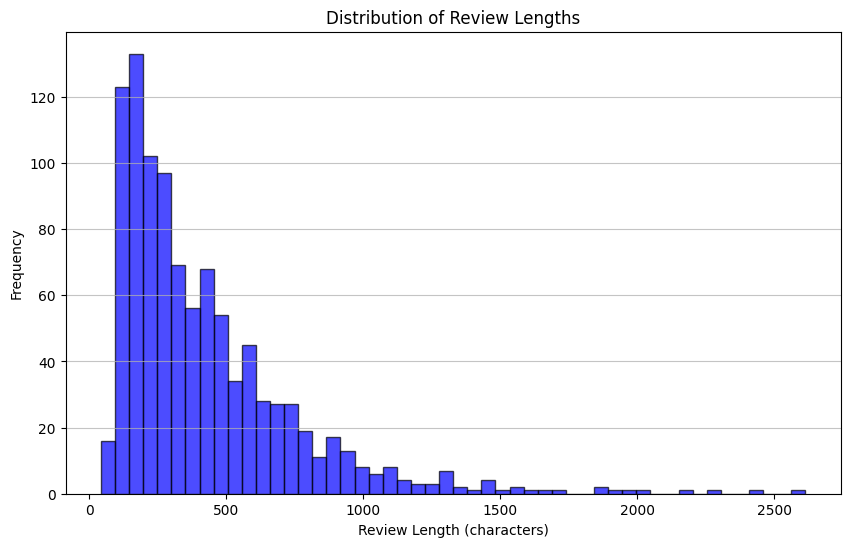

In [45]:
# Calculate review length
data['review_length'] = data['text'].apply(len)

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(data['review_length'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [46]:
print(data['review_length'])

0      876
1      384
2      337
3      358
4      735
      ... 
995    151
996    513
997    221
998    233
999    712
Name: review_length, Length: 1000, dtype: int64


##### Code cell 3

In [47]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column to get TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Display the shape of the TF-IDF matrix
print("Shape of Matrix:", tfidf_matrix.shape)

Shape of Matrix: (1000, 6039)


In [48]:
import umap

# Initialize UMAP
umap_reducer = umap.UMAP(n_components=5, n_neighbors=15, metric='cosine', random_state=42)

# Fit UMAP on the TF-IDF matrix
umap_embedding = umap_reducer.fit_transform(tfidf_matrix)

# Display the shape of the resulting embeddings
print("Shape of UMAP Embeddings:", umap_embedding.shape)

Shape of UMAP Embeddings: (1000, 5)


##### Code cell 4

In [49]:
!pip install bertopic

In [50]:
from bertopic import BERTopic

documents = data['text'].tolist()
topic_model = BERTopic()

# Fit the model
topics, probabilities = topic_model.fit_transform(documents)

In [51]:
probabilities

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.95057281,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

#### Code cell 5

In [52]:
top_topics = topic_model.get_topic_info()

# Display Information for the top 6 topics
top_6_topics = top_topics.head(7)
top_6_topics.head()

,Topic,Count,Name,Representation,Representative_Docs
0,0,989,0_the_and_to_was,"[the, and, to, was, is, of, it, for, in, this]",[My local Tucsonan friend talked up this resta...
1,1,11,1_persian_and_the_food,"[persian, and, the, food, we, room, to, is, as...",[I would give it a 3.5 for decor and food. Aut...


In [53]:
a_topic = top_topics.iloc[1]["Topic"] # Select the 1st topic
topic_model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('persian', 0.179760873914231),
 ('and', 0.10165068167626118),
 ('the', 0.09879681768297466),
 ('food', 0.09649343550029035),
 ('we', 0.08580818985978672),
 ('room', 0.0801188167276391),
 ('to', 0.07784346063390946),
 ('is', 0.056698782140123624),
 ('as', 0.05352044265093645),
 ('of', 0.051251318175814214)]

In [54]:
for topic_num in top_6_topics['Topic'][:6]:
    print(f"Topic {topic_num} representative document(s):")
    representative_docs = topic_model.get_topic(topic_num)
    for doc in representative_docs:
        print(doc)
    print("\n")

Topic 0 representative document(s):
('the', 0.12478707894408814)
('and', 0.10415952139442751)
('to', 0.07234630615462885)
('was', 0.06641523231194191)
('is', 0.04942064344596558)
('of', 0.04887863113715884)
('it', 0.047898008412847394)
('for', 0.04603010544214943)
('in', 0.04432408391387639)
('this', 0.039483358243857576)


Topic 1 representative document(s):
('persian', 0.179760873914231)
('and', 0.10165068167626118)
('the', 0.09879681768297466)
('food', 0.09649343550029035)
('we', 0.08580818985978672)
('room', 0.0801188167276391)
('to', 0.07784346063390946)
('is', 0.056698782140123624)
('as', 0.05352044265093645)
('of', 0.051251318175814214)




In [55]:
topic_model.visualize_barchart(top_n_topics=6)

In [56]:
topic_model.visualize_heatmap(top_n_topics=30)

In [57]:
topic_model.get_topics()

{0: [('the', 0.12478707894408814),
  ('and', 0.10415952139442751),
  ('to', 0.07234630615462885),
  ('was', 0.06641523231194191),
  ('is', 0.04942064344596558),
  ('of', 0.04887863113715884),
  ('it', 0.047898008412847394),
  ('for', 0.04603010544214943),
  ('in', 0.04432408391387639),
  ('this', 0.039483358243857576)],
 1: [('persian', 0.179760873914231),
  ('and', 0.10165068167626118),
  ('the', 0.09879681768297466),
  ('food', 0.09649343550029035),
  ('we', 0.08580818985978672),
  ('room', 0.0801188167276391),
  ('to', 0.07784346063390946),
  ('is', 0.056698782140123624),
  ('as', 0.05352044265093645),
  ('of', 0.051251318175814214)]}

##### Code cell 6

In [58]:
for topic_num in top_6_topics['Topic'][:6]:
    print(f"Topic {topic_num} representative document(s):")
    representative_docs = topic_model.get_representative_docs(topic_num)
    for doc in representative_docs:
        print(doc)
    print("\n")

Topic 0 representative document(s):
My local Tucsonan friend talked up this restaurant so much that I had to go try it out.

Food was not bad at all - ordered four tacos: two carne asada tacos, a chicken taco, and a fish taco. They came out pretty quick, fresh, and they came with plenty of toppings in individual containers. My friend told me that pre-Covid, they used to have a salsa bar, which is not temporarily closed.
I also tried my first Sonoran Hot Dog which was pretty good, but I'd had better hot dogs before.

The only downside about this location? Service.
After we were seated, despite the many servers who walked by our table and looking in our direction, NOBODY bothered to stop by. We waited a while, and then waited some more, until I eventually had to ask my friend, "is this restaurant full service or do you have to order at the bar?" to which she replied, "It was full service before Covid, but maybe it changed?". So, I got up and walked to the bar and asked to the guy behind 

In [59]:
similar_topics, similarity = topic_model.find_topics("food", top_n = 3)

In [60]:
similar_topics

[0, 1]

In [61]:
topic_model.visualize_term_rank()

##### Code cell 7

In [62]:
topic_model.visualize_topics(top_n_topics=1)

In [63]:
topic_model.visualize_hierarchy(top_n_topics=6)

In [64]:
print(probabilities)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.95057281 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         

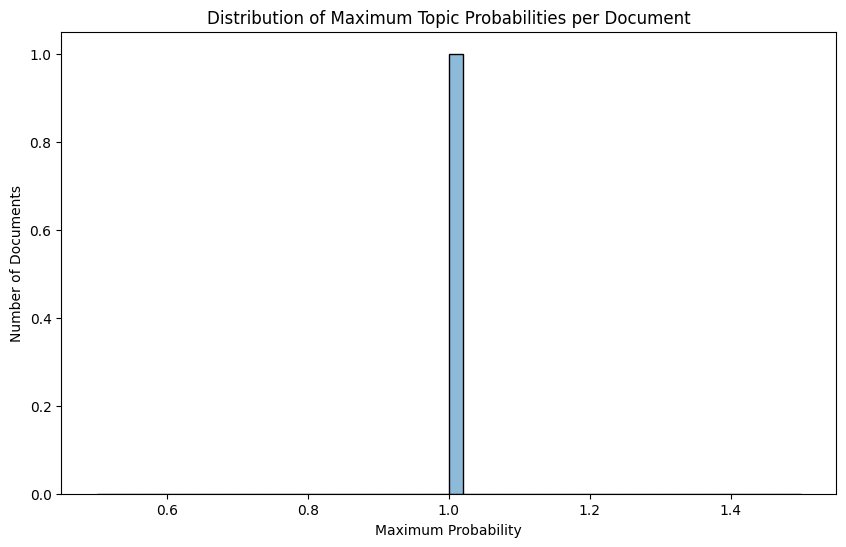

In [65]:
probabilities =  [[1.        , 1.        , 0.96545761, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99147638,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99996   , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99863842,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99690176, 1.        , 1.        , 1.        ,
       1.        , 0.8972437 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.96335381, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.9888709 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.89890657, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.97946741, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.96304389, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.       ] ]

# Convert the list of probabilities to a list containing the maximum probability for each document
max_probabilities = [max(doc_probs) if doc_probs else 0 for doc_probs in probabilities]

# Plot the distribution of max probabilities
plt.figure(figsize=(10, 6))
sns.histplot(max_probabilities, bins=50, kde=True)
plt.title('Distribution of Maximum Topic Probabilities per Document')
plt.xlabel('Maximum Probability')
plt.ylabel('Number of Documents')
plt.show()


##### Code cell 8

From the above outputs we can infer :

**Distribution of Maximum Topic Probabilities per Document**: The histogram shows a very sharp peak at probability 1.0, with no other bars visible. This indicates that for the vast majority of documents, there is one topic that the model assigns with near certainty. This could mean that the topics are very well-defined and distinct from each other, which is usually a sign of a good topic model. However, it might also indicate that the model is overconfident, or there's an issue with how probabilities are calculated or represented. In a more nuanced dataset, you would expect a smoother distribution of probabilities, not just a peak at 1.0.

**Hierarchical Clustering**: The dendrogram shows two topics, but it doesn't provide much information about the hierarchy or distance between topics because the visualization is truncated. Usually, a dendrogram would show how topics merge at different levels of similarity, but here we can't see this information. This could suggest that the topics are either very similar or the visualization is not displaying all the necessary information.

**Intertopic Distance Map** : The intertopic distance map (presumably generated using something like t-SNE or UMAP for dimensionality reduction) shows two topics, D1 and D2, overlapping in a single bubble. This could imply that the topics are not distinct from each other, or it might be a visualization issue where distinct topics are represented on top of each other due to scaling or parameter settings.

Ultimately, these visuals imply that the topic model might not be operating as planned. The probability distribution's great confidence is rare, and the intertopic distance map's overlap raises concerns about the topics' distinctness. It's also conceivable that problems with the visualizations' scaling or settings are causing them to inaccurately depict the underlying data.

##### Code cell 9

In [66]:
#Transfer to time format
data['tweet_created_format']=data['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

#Create topics over time
topics_over_time = topic_model.topics_over_time(data.text, timestamps=data.tweet_created_format, nr_bins=20)

In [67]:
topic_model.visualize_topics_over_time(topics_over_time, topics = [0, 1, 2, 3, 4, 5])

##### Code cell 10


Based on the "Topics over Time" visualization, we can observe the following:

**Topic Prevalence**: The topic labeled as "0_the_and_to_was" appears to be the most prevalent topic over time. Its frequency is significantly higher compared to "1_persian_and_the".

**Temporal Trends**:There's a sharp decline in the frequency of the predominant topic "0_the_and_to_was" early in the timeline, which then stabilizes before showing a moderate peak around October 2020.

Following the peak, there's a gradual decline in frequency over time. This could indicate a waning interest in the subject matter of this topic or perhaps a shift in focus towards other topics not shown here.

The second topic "1_persian_and_the" has a consistently low frequency throughout the time period, suggesting it is a niche topic within the dataset.

**Business Insights**:The reasons behind the sharp decrease early in the timeline might be of interest. It could be related to external events or changes in the data source.

The moderate peak for "0_the_and_to_was" could indicate seasonal interest or a temporary event that brought this topic to prominence. It would be useful to investigate what happened around October 2020 that might explain this peak.

The overall decline in "0_the_and_to_was" could suggest that the relevance or popularity of the issues, products, or services related to this topic is decreasing over time.

The consistently low frequency of "1_persian_and_the" might suggest that while this topic is less discussed overall, it has a steady, perhaps loyal, interest group. For a business, it might represent a stable but smaller market segment.

##### Code cell 11

In [68]:
docs=data['text']
classes=data['stars']

#Create topics per class
topics_per_class = topic_model.topics_per_class(docs, classes=classes)

topic_model.visualize_topics_per_class(topics_per_class)

##### Code cell 12

Here's an interpretation of the findings:

**Topic Frequency in Different Classes**: The chart suggests that the topic "0_the_and_to_was" is far more prevalent across all classes compared to "1_persian_and_the". If we assume that lower classes (e.g., Class 1) represent 1-star reviews and higher classes (e.g., Class 5) represent 5-star reviews, it seems that "0_the_and_to_was" is a topic of discussion across the spectrum of review ratings.

**Major Topics**:The topic "0_the_and_to_was" seems to contain common words ("the", "and", "to", "was") that could be part of general discussion, thus appearing frequently across different ratings. This might not be very informative regarding the specifics of good or bad experiences unless further context from the words within the topic is provided.

The topic "1_persian_and_the" might be associated with Persian cuisine or perhaps a specific restaurant. Its lower frequency suggests it is a niche topic, possibly only mentioned in certain contexts.

**Business Implications**:The high frequency of the generic topic "0_the_and_to_was" across all review classes may not offer actionable insights for a business. However, if these are indeed common words, a business might look into the context in which they are used to understand the specifics of customer sentiment.

For "1_persian_and_the", if this topic is indeed related to Persian cuisine, its presence across different review classes could indicate varying experiences with this cuisine or a specific Persian restaurant. The business could investigate what aspects of the Persian cuisine or service are leading to positive reviews and what aspects are leading to negative reviews.

Understanding the context of these topics can help a restaurant address specific concerns raised in poor reviews and highlight the strengths mentioned in good reviews.

I acknowledge I have used chatgpt

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
pip install --upgrade nbconvert


In [71]:
ls "/content/drive/MyDrive/Colab Notebooks/LA6_JainGarvita.ipynb"

'/content/drive/MyDrive/Colab Notebooks/LA6_JainGarvita.ipynb'


In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/LA6_JainGarvita.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/LA6_JainGarvita.ipynb to html


In [ ]:
!pip install --upgrade nbconvert
!pip install --upgrade notebook

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/LA6_JainGarvita.ipynb"
